In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import tensorflow
tensorflow.random.set_seed(115)

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
result=[]
def getClassificationResult(model,x_test,y_test):
    y_true=y_test
    y_pred=model.predict(x_test)
    
    if len(y_pred.shape) == 2:
        y_pred=np.argmax(y_pred, axis=1)
    if len(y_true.shape) == 2:
        y_true=np.argmax(y_true, axis=1)
    ac=round(accuracy_score(y_true, y_pred),4)
    pr=round(precision_score(y_true, y_pred,average='weighted'),4)
    re=round(recall_score(y_true, y_pred,average='weighted'),4)
    f1=round(f1_score(y_true, y_pred,average='weighted'),4)
    return model,ac,pr,re,f1

Dataset Load From Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df_dir= '/content/drive/MyDrive/Assignment1_Dataset/Dataset.csv'

Mounted at /content/drive


In [4]:
df=pd.read_csv(df_dir)

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Removing Stop Words

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stemming

In [7]:
from nltk.stem import PorterStemmer
#Stemming
ps = PorterStemmer()

def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [ps.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [8]:
df['Text'] = df['Text'].apply(stem_sentences)

In [9]:
x=df["Text"]
y=df["Sentiment"]

TF-IDF + ANN

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

x=tf.fit_transform(x)

x=x.toarray()

In [11]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [13]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelEncoder= LabelEncoder()

In [14]:
y_train_new=to_categorical(labelEncoder.fit_transform(ytrain))
y_test_new=to_categorical(labelEncoder.fit_transform(ytest))

In [15]:
input_size=xtrain.shape[1]
xtrain.shape[1]

8944

In [17]:
model1=Sequential()
#first layer
model1.add(Dense(100,input_shape=(input_size,)))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

#second layer
model1.add(Dense(100))
model1.add(Activation('relu'))
model1.add(Dropout(0.1))

#third layer
model1.add(Dense(100))
model1.add(Activation('relu'))
model1.add(Dropout(0.1))




#final layer
model1.add(Dense(2))
model1.add(Activation('softmax'))

In [18]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model1.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [19]:


model1.fit(xtrain,y_train_new,batch_size=32,epochs=20,validation_data=(xtest,y_test_new))

Epoch 1/20
145/145 [==============================] - 2s 9ms/step - loss: 0.5720 - accuracy: 0.6807 - val_loss: 0.4712 - val_accuracy: 0.7826
Epoch 2/20
145/145 [==============================] - 1s 8ms/step - loss: 0.2722 - accuracy: 0.8908 - val_loss: 0.4710 - val_accuracy: 0.7895
Epoch 3/20
145/145 [==============================] - 1s 8ms/step - loss: 0.0838 - accuracy: 0.9702 - val_loss: 0.6390 - val_accuracy: 0.7860
Epoch 4/20
145/145 [==============================] - 1s 8ms/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 0.8266 - val_accuracy: 0.7921
Epoch 5/20
145/145 [==============================] - 1s 8ms/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.9765 - val_accuracy: 0.7869
Epoch 6/20
145/145 [==============================] - 1s 8ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.0582 - val_accuracy: 0.7895
Epoch 7/20
145/145 [==============================] - 1s 8ms/step - loss: 0.0021 - accuracy: 0.9998 - val_loss: 1.1182 - val_accuracy: 0.7860
Epoch 

In [20]:
model1.evaluate(xtest,y_test_new)[1]

37/37 [==============================] - 0s 4ms/step - loss: 1.5953 - accuracy: 0.7903


0.7903364896774292

In [22]:
result.append(getClassificationResult(model1,xtest,y_test_new))

BoW + ANN

In [23]:
x=df["Text"]
y=df["Sentiment"]

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()


x=cv.fit_transform(x)

x=x.toarray()

In [25]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [26]:
y_train_new=to_categorical(labelEncoder.fit_transform(ytrain))
y_test_new=to_categorical(labelEncoder.fit_transform(ytest))

In [27]:
input_size=xtrain.shape[1]
xtrain.shape[1]

8944

In [32]:
model2=Sequential()
#first layer
model2.add(Dense(100,input_shape=(input_size,)))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))

#second layer
model2.add(Dense(100))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

#third layer
model2.add(Dense(100))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))



#final layer
model2.add(Dense(2))
model2.add(Activation('softmax'))

In [33]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model2.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [34]:


model2.fit(xtrain,y_train_new,batch_size=32,epochs=20,validation_data=(xtest,y_test_new))

Epoch 1/20
145/145 [==============================] - 2s 10ms/step - loss: 0.5563 - accuracy: 0.7122 - val_loss: 0.4995 - val_accuracy: 0.7550
Epoch 2/20
145/145 [==============================] - 1s 9ms/step - loss: 0.2571 - accuracy: 0.8994 - val_loss: 0.5578 - val_accuracy: 0.7679
Epoch 3/20
145/145 [==============================] - 1s 9ms/step - loss: 0.0904 - accuracy: 0.9698 - val_loss: 0.7524 - val_accuracy: 0.7662
Epoch 4/20
145/145 [==============================] - 1s 9ms/step - loss: 0.0213 - accuracy: 0.9927 - val_loss: 1.1224 - val_accuracy: 0.7653
Epoch 5/20
145/145 [==============================] - 1s 10ms/step - loss: 0.0114 - accuracy: 0.9968 - val_loss: 1.2591 - val_accuracy: 0.7610
Epoch 6/20
145/145 [==============================] - 2s 10ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 1.4224 - val_accuracy: 0.7670
Epoch 7/20
145/145 [==============================] - 1s 9ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 1.5589 - val_accuracy: 0.7662
Epo

In [35]:
model2.evaluate(xtest,y_test_new)[1]

37/37 [==============================] - 0s 4ms/step - loss: 1.8165 - accuracy: 0.7679


0.7679033875465393

In [36]:
result.append(getClassificationResult(model2,xtest,y_test_new))

One Hot Embedding + CNN

In [37]:
x=df["Text"]
y=df["Sentiment"]

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(binary=True)


x=cv.fit_transform(x)

x=x.toarray()

In [39]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [40]:
y_train_new=to_categorical(labelEncoder.fit_transform(ytrain))
y_test_new=to_categorical(labelEncoder.fit_transform(ytest))

In [ ]:
input_size=xtrain.shape[1]
xtrain.shape[1]

8944

In [41]:


from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D, Embedding
from keras.datasets import imdb
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np


In [42]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(sequences=xtrain, maxlen=800)
x_test = sequence.pad_sequences(sequences=xtest, maxlen=800)
print('x_train shape:', xtrain.shape)
print('x_test shape:', xtest.shape)

print('Build model...')
model3 = Sequential()

Pad sequences (samples x time)
x_train shape: (4632, 8944)
x_test shape: (1159, 8944)
Build model...


In [43]:
model3.add(Embedding(input_dim=10000,
                    output_dim=50,
                    input_length=8944))

In [44]:
model3.add(Dropout(0.1))

In [45]:
model3.add(Conv1D(filters=250,
                 kernel_size=1,
                 padding='same',
                 activation='relu',
                 strides=1))

In [46]:
model3.add(GlobalMaxPooling1D())

In [47]:
model3.add(Dense(250))
model3.add(Activation('relu'))

In [48]:
model3.add(Dense(1, activation='softmax'))

In [49]:
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])      

In [50]:
history = model3.fit(xtrain, ytrain,
                    batch_size=32,
                    epochs=10,
                    validation_data=(xtest, ytest))

Epoch 1/10
145/145 [==============================] - 153s 1s/step - loss: 0.5947 - accuracy: 0.6367 - val_loss: 0.6000 - val_accuracy: 0.6350
Epoch 2/10
145/145 [==============================] - 140s 969ms/step - loss: 0.5919 - accuracy: 0.6367 - val_loss: 0.6069 - val_accuracy: 0.6350
Epoch 3/10
145/145 [==============================] - 140s 969ms/step - loss: 0.5889 - accuracy: 0.6367 - val_loss: 0.5914 - val_accuracy: 0.6350
Epoch 4/10
145/145 [==============================] - 138s 954ms/step - loss: 0.5889 - accuracy: 0.6367 - val_loss: 0.6152 - val_accuracy: 0.6350
Epoch 5/10
145/145 [==============================] - 140s 965ms/step - loss: 0.5888 - accuracy: 0.6367 - val_loss: 0.5846 - val_accuracy: 0.6350
Epoch 6/10
145/145 [==============================] - 137s 948ms/step - loss: 0.5900 - accuracy: 0.6367 - val_loss: 0.5970 - val_accuracy: 0.6350
Epoch 7/10
145/145 [==============================] - 144s 993ms/step - loss: 0.5896 - accuracy: 0.6367 - val_loss: 0.5865 - va

In [65]:
result.append(getClassificationResult(model3,xtest,ytest))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
result

[(<keras.engine.sequential.Sequential at 0x7f46fa118110>,
  0.7903,
  0.7876,
  0.7903,
  0.7878),
 (<keras.engine.sequential.Sequential at 0x7f468be05650>,
  0.7679,
  0.7638,
  0.7679,
  0.7643),
 (<keras.engine.sequential.Sequential at 0x7f468c128d10>, 0.0, 0.0, 0.0, 0.0),
 (<keras.engine.sequential.Sequential at 0x7f468c128d10>,
  0.635,
  0.4033,
  0.635,
  0.4933)]

#### Result

In [68]:
print("Model1 Accuracy,Precision,Recall,F1Score: ",result[0][1],result[0][2],result[0][3],result[0][4])
print("Model2 Accuracy,Precision,Recall,F1Score: ",result[1][1],result[1][2],result[1][3],result[1][4])
print("Model3 Accuracy,Precision,Recall,F1Score: ",result[2][1],result[2][2],result[2][3],result[2][4])

Model1 Accuracy,Precision,Recall,F1Score:  0.7903 0.7876 0.7903 0.7878
Model2 Accuracy,Precision,Recall,F1Score:  0.7679 0.7638 0.7679 0.7643
Model3 Accuracy,Precision,Recall,F1Score:  0.635 0.4033 0.635 0.4933


Result Comparison

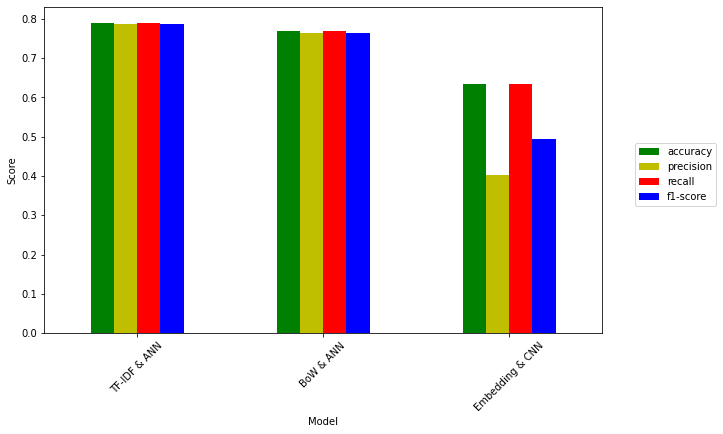

In [82]:
import numpy as np
import matplotlib.pyplot as plt

index = np.arange(5)
bar_width = 0.35

data={'accuracy':[result[0][1],result[1][1],result[2][1]],'precision':[result[0][2],result[1][2],result[2][2]],'recall':[result[0][3],result[1][3],result[2][3]],'f1-score':[result[0][4],result[1][4],result[2][4]],'Model':['TF-IDF & ANN','BoW & ANN','Embedding & CNN']}
df = pd.DataFrame(data)

ax = df[["Model","accuracy", "precision", "recall", "f1-score"]].plot(x='Model', 
                                                      kind='bar', 
                                                      color=["g","y","r","b"],
                                                      rot=45,figsize=(10,6))
ax.set_ylabel('Score')
ax.legend(["accuracy", "precision","recall", "f1-score"],bbox_to_anchor = (1.05, 0.6));


#### Result: 


*   TF+IDF with ANN model performs better result than other (79% Accuracy)
*   Increasing no of epoch and hidden layer may increase performance.
*   1d CNN performs less


